In [29]:
import numpy as np
import pandas as pd
import sklearn.metrics

In [30]:
train_data = pd.read_csv('aug_train.csv')
test_data = pd.read_csv('aug_test.csv')
y_test = np.load('answer.npy')
train_samples = len(train_data)
test_samples = len(test_data)
#print(train_samples, test_samples)

In [31]:
data = pd.concat([train_data, test_data])
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0.0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0.0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0.0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0.0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26,NaN
78269,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185,NaN
78270,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101,NaN
78271,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86,NaN


In [32]:
data = pd.get_dummies(data, columns=['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'])
data

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Region_Code_0.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,167647,22,1,1,2630.0,16,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,17163,42,1,0,43327.0,135,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,32023,66,1,0,35841.0,253,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87447,22,1,0,27645.0,69,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,501933,28,1,1,29023.0,211,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,43,1,0,2630.0,26,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78269,417524,21,1,1,32937.0,185,NaN,1,0,0,...,1,0,0,0,0,0,0,0,0,0
78270,188087,48,1,1,35247.0,101,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78271,215680,64,1,1,25705.0,86,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_data = data.iloc[0:train_samples]
test_data = data.iloc[train_samples:]

In [34]:
test_data = test_data.drop('Response', axis=1)
test_data

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Gender_Female,Gender_Male,Region_Code_0.0,Region_Code_1.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,57782,34,1,1,38244.0,146,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,286811,55,1,0,37577.0,109,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,117823,39,1,1,24578.0,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,213992,28,1,1,40507.0,129,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,324756,24,1,0,36783.0,201,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,43,1,0,2630.0,26,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
78269,417524,21,1,1,32937.0,185,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
78270,188087,48,1,1,35247.0,101,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
78271,215680,64,1,1,25705.0,86,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_data

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Region_Code_0.0,Region_Code_1.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,22,1,1,2630.0,16,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,42,1,0,43327.0,135,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66,1,0,35841.0,253,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,1,0,27645.0,69,0.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,28,1,1,29023.0,211,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,24,1,0,23938.0,105,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
382150,27,1,1,336395.0,144,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
382151,45,1,0,40443.0,187,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
382152,28,1,1,25380.0,208,0.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
sum(train_data['Driving_License'])

381431

In [35]:
# Remove id attribute since as it is irrelevant for training
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

In [36]:
X_train = train_data.drop('Response', axis=1)
y_train = train_data['Response']
X_test = test_data

In [37]:
y_train.value_counts()
# 16% ones; not an extreme imbalance, but sufficient enough that we run into issues with standard techniques

0.0    319553
1.0     62601
Name: Response, dtype: int64

In [38]:
#converting to np arrays to be able to use training functions
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

In [39]:
# my_cross_val function from hw1; modified one is in cell below 
def my_cross_val(model, loss_func, X, y, k=10):
    (n, d) = X.shape
    validation_losses = np.zeros(k)
    for i in range(k):
        val_set = X[round(i*n/k):round((i+1)*n/k), :]
        val_labels = y[round(i*n/k):round((i+1)*n/k)]
        train_set = np.delete(X, [j for j in range(round(i*n/k), round((i+1)*n/k))], 0)
        train_labels = np.delete(y, [j for j in range(round(i*n/k), round((i+1)*n/k))], 0)
        model.fit(train_set, train_labels)
        y_preds = model.predict(val_set)
        
        val_loss = 0
        for j in range(len(y_preds)):
            if loss_func == 'mse':
                val_loss += (val_labels[j] - y_preds[j])**2
            if loss_func == 'err_rate' and (val_labels[j] != y_preds[j]):
                val_loss += 1
        val_loss *= (1/len(y_preds))
        validation_losses[i] = val_loss
    return validation_losses

In [51]:
# Metric: choice of evaluation metric (f1, precision, recall, etc.)
# Proportion: proportion of test set to predict as 1s, if needed (logistic regression may predict all 0 by default)
def my_cross_val_imbalanced(model, metric, proportion, X, y, k=10):
    (n, d) = X.shape
    validation_metrics = np.zeros(k)
    for i in range(k):
        val_set = X[round(i*n/k):round((i+1)*n/k), :]
        val_labels = y[round(i*n/k):round((i+1)*n/k)]
        train_set = np.delete(X, [j for j in range(round(i*n/k), round((i+1)*n/k))], 0)
        train_labels = np.delete(y, [j for j in range(round(i*n/k), round((i+1)*n/k))], 0)
        model.fit(train_set, train_labels)
        if proportion == None:
            y_preds = model.predict(val_set)
        else:
            y_preds = model.predict_proportion(val_set, proportion)
        
        tp, fp, tn, fn = 0, 0, 0, 0
        score = 0
        for j in range(len(y_preds)):
            if val_labels[j] == 1 and y_preds[j] == 1:
                tp += 1
            elif val_labels[j] == 1:
                fn += 1
            elif y_preds[j] == 1:
                fp += 1
            else:
                tn += 1
        if tp == 0: # to avoid division by zero error for trivial models
            precision = 0
            recall = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)  
        if metric == 'precision':
            score = precision
        if metric == 'recall':
            score = recall
        if metric == 'f1':
            if precision + recall == 0:
                score = 0
            else:
                score = 2 * precision * recall / (precision + recall)
        #if metric == 'auprc':
            #score = sklearn.metrics.average_precision_score(val_labels, y_preds)
        validation_metrics[i] = score
    return validation_metrics

In [64]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
def L(y, x, w, weight): # weighted log loss function
    return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))

class MyWeightedLogisticRegression:

    def __init__(self, d, max_iters, eta_val, weight):
        self.w = np.zeros(d)
        self.w_old = np.random.uniform(-0.01, 0.01, d)
        self.w_sum = np.zeros(d)
        self.w_sum += self.w_old
        self.max_iters = max_iters
        self.eta_val = eta_val
        self.weight = weight
        self.iters = 0 # keep track of iterations made
        self.losses = [] # used to keep track of losses for plotting purposes
        self.gradient_magnitudes = [] 
    def fit(self, X, y):
        (n, d) = X.shape
        while self.iters < self.max_iters:
            i = np.random.randint(n)
            z = sigmoid(X @ self.w_old)
            self.losses.append(L(z[i], X[i, :], self.w_old, self.weight))
            gradient_magnitude = 0
            for j in range(d):
                gradient_j = - (y[i]*X[i, j]*(self.weight*sigmoid(-self.w_old @ X[i, :]) + sigmoid(self.w_old @ X[i, :])) - X[i, j] * sigmoid(self.w_old @ X[i, :]))
                self.w[j] = self.w_old[j] - self.eta_val*gradient_j
                gradient_magnitude += gradient_j**2
                self.w_old[j] = self.w[j]
            self.gradient_magnitudes.append(gradient_magnitude)
            self.w_sum += self.w
            self.iters += 1
            if np.average(self.gradient_magnitudes[-10:]) < 1e-7:
                break
    def predict(self, X):
        w_avg = self.w_sum / self.iters
        return np.round(sigmoid(X @ w_avg))
    def predict_values(self, X):
        w_avg = self.w_sum / self.iters
        return X @ w_avg
    def predict_proportion(self, X, prop): #predict a certain number of 1s
        w_avg = self.w_sum / self.iters
        #probs = sigmoid(X @ w_avg)
        #print(probs)
        values = X @ w_avg
        threshold = np.quantile(values, 1-prop)
        print("Threshold: ", threshold)
        preds = np.zeros(len(values))
        for i in range(len(preds)):
            if values[i] >= threshold:
                preds[i] = 1
        return preds

In [42]:
#Demonstration of standard LR with error rate predicting everything as 0

eta_vals = [0.001, 0.01, 0.1]

best_loss = np.inf
best_eta = 0

(_, num_features) = X_train.shape

# Logistic Regression
for eta_val in eta_vals:

    # instantiate logistic regression object
    lr = MyWeightedLogisticRegression(num_features, 100000, eta_val, 1)

    # call to your CV function to compute error rates for each fold
    cv_losses = my_cross_val(lr, 'err_rate', X_train, y_train, k=10)

    # print error rates from CV
    print("Eta: " + str(eta_val))
    for i in range(10):
        print("Error rate for fold " + str(i) + ": " + str(cv_losses[i]))
    mean_loss = sum(cv_losses)/len(cv_losses)
    print("Mean validation error rate: " + str(mean_loss))
    print("Validation error rate stdev: " + str(np.std(cv_losses)))
    if mean_loss < best_loss:
        best_loss = mean_loss
        best_eta = eta_val

# instantiate logistic regression object for best value of eta
print("Best eta value: " + str(best_eta))
best_lr = MyWeightedLogisticRegression(num_features, 100000, best_eta, 1)

# fit model using all training data
best_lr.fit(X_train, y_train)

# predict on test data
y_preds = best_lr.predict(X_test)
print("Number of positive predictions: ", sum(y_preds))

# compute error rate on test data
errors = 0
for i in range(len(y_test)):
    if y_preds[i] != y_test[i]:
        errors += 1
error_rate = errors/len(y_test)

# print error rate on test data
print("Test error rate: " + str(error_rate))

C:\Users\andri\AppData\Local\Temp\ipykernel_28780\363175868.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
C:\Users\andri\AppData\Local\Temp\ipykernel_28780\363175868.py:4: RuntimeWarning: divide by zero encountered in log
  return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))
C:\Users\andri\AppData\Local\Temp\ipykernel_28780\363175868.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))


Eta: 0.001
Error rate for fold 0: 0.16456888656286797
Error rate for fold 1: 0.16432907682646014
Error rate for fold 2: 0.16218762266125866
Error rate for fold 3: 0.16354406531295793
Error rate for fold 4: 0.16318199659819443
Error rate for fold 5: 0.1655109250294387
Error rate for fold 6: 0.16480008373456145
Error rate for fold 7: 0.1616904356927908
Error rate for fold 8: 0.1648524178354616
Error rate for fold 9: 0.16344367395001963
Mean validation error rate: 0.16381091842040113
Validation error rate stdev: 0.0011631574794504068
Eta: 0.01
Error rate for fold 0: 0.8354311134371321
Error rate for fold 1: 0.16432907682646014
Error rate for fold 2: 0.16218762266125866
Error rate for fold 3: 0.16354406531295793
Error rate for fold 4: 0.16318199659819443
Error rate for fold 5: 0.1655109250294387
Error rate for fold 6: 0.16480008373456145
Error rate for fold 7: 0.1616904356927908
Error rate for fold 8: 0.1648524178354616
Error rate for fold 9: 0.16344367395001963
Mean validation error rate:

In [43]:
def precision_recall_f1(preds, truth):
    tp, fp, tn, fn = 0, 0, 0, 0
    for j in range(len(preds)):
        if truth[j] == 1 and preds[j] == 1:
            tp += 1
        elif truth[j] == 1:
            fn += 1
        elif preds[j] == 1:
            fp += 1
        else:
            tn += 1
    if tp + fp > 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    if precision + recall > 0:
        f1 = 2 * precision * recall / (precision + recall)
    else: 
        f1 = 0
    return (precision, recall, f1)

In [60]:
# Weighted Logistic Regression
eta_vals = [0.001, 0.01, 0.1]
weight_vals = [1, 2, 5, 10, 20, 50]

best_score = 0
best_eta = 0
best_weight = 0

(_, num_features) = X_train.shape
proportion = sum(y_train)/len(y_train)

# Logistic Regression
for eta_val in eta_vals:
    for weight in weight_vals:

        # instantiate logistic regression object
        lr = MyWeightedLogisticRegression(num_features, 1000000, eta_val, weight)

        # call to your CV function to compute error rates for each fold
        #cv_scores = my_cross_val_imbalanced(lr, 'auprc', proportion, X_train, y_train, k=10)
        cv_scores = my_cross_val_imbalanced(lr, 'f1', None, X_train, y_train, k=10)

        # print error rates from CV
        print("Eta: " + str(eta_val))
        print("Weight: " + str(weight))
        for i in range(10):
            print("F1 score for fold " + str(i) + ": " + str(cv_scores[i]))
        mean_score = sum(cv_scores)/len(cv_scores)
        print("Mean validation F1 score: " + str(mean_score))
        print("Validation F1 score stdev: " + str(np.std(cv_scores)))
        if mean_score >= best_score:
            best_score = mean_score
            best_eta = eta_val
            best_weight = weight

# instantiate logistic regression object for best value of eta
print("Best eta value: " + str(best_eta))
print("Best weight value: " + str(best_weight))
best_lr = MyWeightedLogisticRegression(num_features, 1000000, best_eta, best_weight)

# fit model using all training data
best_lr.fit(X_train, y_train)

# predict on test data
#y_preds = best_lr.predict_proportion(X_test, proportion)
y_preds = best_lr.predict(X_test)
print("Number of positive predictions: ", sum(y_preds))
y_probs = best_lr.predict_probs(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_probs)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

C:\Users\andri\AppData\Local\Temp\ipykernel_28780\3563418974.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
C:\Users\andri\AppData\Local\Temp\ipykernel_28780\3563418974.py:4: RuntimeWarning: divide by zero encountered in log
  return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))
C:\Users\andri\AppData\Local\Temp\ipykernel_28780\3563418974.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))


Eta: 0.001
Weight: 1
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 0.001
Weight: 2
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 0.001
Weight: 5
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.2805786146543385
F1 score for fold 5: 0.2840143691064212
F1 score for fold 6: 0.2829671564002336
F1 score for fold 7: 0.2783709510294184
F1 score for fold 8: 0.2830442986791266
F1 score for fo

Number of positive predictions:  78273.0
Test precision: 0.1637601727287826
Test recall: 1.0
Test F1 score: 0.28143285286142433
Test AUPRC score: 0.1637601727287826


In [65]:
# Weighted Logistic Regression with predicting fixed proportion of 1s 
eta_vals = [0.001, 0.01, 0.1]
weight_vals = [1, 2, 5, 10, 20, 50]

best_score = 0
best_eta = 0
best_weight = 0

(_, num_features) = X_train.shape
proportion = sum(y_train)/len(y_train)

# Logistic Regression
for eta_val in eta_vals:
    for weight in weight_vals:

        # instantiate logistic regression object
        lr = MyWeightedLogisticRegression(num_features, 10000000, eta_val, weight)

        # call to your CV function to compute error rates for each fold
        cv_scores = my_cross_val_imbalanced(lr, 'f1', proportion, X_train, y_train, k=10)
        #cv_scores = my_cross_val_imbalanced(lr, 'auprc', None, X_train, y_train, k=10)

        # print error rates from CV
        print("Eta: " + str(eta_val))
        print("Weight: " + str(weight))
        for i in range(10):
            print("F1 score for fold " + str(i) + ": " + str(cv_scores[i]))
        mean_score = sum(cv_scores)/len(cv_scores)
        print("Mean validation F1 score: " + str(mean_score))
        print("Validation F1 score stdev: " + str(np.std(cv_scores)))
        if mean_score >= best_score:
            best_score = mean_score
            best_eta = eta_val
            best_weight = weight

# instantiate logistic regression object for best value of eta
print("Best eta value: " + str(best_eta))
print("Best weight value: " + str(best_weight))
best_lr = MyWeightedLogisticRegression(num_features, 10000000, best_eta, best_weight)

# fit model using all training data
best_lr.fit(X_train, y_train)

# predict on test data
y_preds = best_lr.predict_proportion(X_test, proportion)
#y_preds = best_lr.predict(X_test)
print("Number of positive predictions: ", sum(y_preds))
y_values = best_lr.predict_values(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_values)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

C:\Users\andri\AppData\Local\Temp\ipykernel_28780\617410271.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
C:\Users\andri\AppData\Local\Temp\ipykernel_28780\617410271.py:4: RuntimeWarning: divide by zero encountered in log
  return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))
C:\Users\andri\AppData\Local\Temp\ipykernel_28780\617410271.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return - (weight * y * np.log(sigmoid(w @ x)) + (1 - y)*np.log(sigmoid(-w @ x)))


Threshold:  -214009.4106393658
Threshold:  -40586.301920185346
Threshold:  -239197.73995608123
Threshold:  -221517.50015097504
Threshold:  -41800.79986000931
Threshold:  -252039.78656123648
Threshold:  -42257.837284848116
Threshold:  -42143.95139308479
Threshold:  -42029.94082962953
Threshold:  -41920.06787736678
Eta: 0.001
Weight: 1
F1 score for fold 0: 0.1797752808988764
F1 score for fold 1: 0.18020891475958856
F1 score for fold 2: 0.16952961952159254
F1 score for fold 3: 0.16305651027096155
F1 score for fold 4: 0.16821382842509602
F1 score for fold 5: 0.1797377830750894
F1 score for fold 6: 0.16593677840592405
F1 score for fold 7: 0.1726826915346893
F1 score for fold 8: 0.1832656635618183
F1 score for fold 9: 0.16967855429393888
Mean validation F1 score: 0.17320856247475752
Validation F1 score stdev: 0.006656314459749049
Threshold:  -126.9304110414535
Threshold:  -21.30366172705752
Threshold:  -115.55323261666506
Threshold:  449039.57248244726
Threshold:  417841.77477793756
Threshol

Threshold:  148259096.0142244
Threshold:  146952311.23770183
Threshold:  145148122.03584543
Threshold:  144367507.32930458
Threshold:  122023957.3426298
Threshold:  121420694.37636822
Threshold:  120505664.6042361
Threshold:  119648105.46078281
Threshold:  118238563.42640178
Threshold:  117395852.9776015
Eta: 0.01
Weight: 20
F1 score for fold 0: 0.19937843652880707
F1 score for fold 1: 0.20062195997129417
F1 score for fold 2: 0.2008348049446139
F1 score for fold 3: 0.20206218527695627
F1 score for fold 4: 0.20406530089628683
F1 score for fold 5: 0.20484704012713548
F1 score for fold 6: 0.20304164344294928
F1 score for fold 7: 0.20258863252673046
F1 score for fold 8: 0.1950481649550195
F1 score for fold 9: 0.20166320166320167
Mean validation F1 score: 0.2014151370332995
Validation F1 score stdev: 0.0026259578668663677
Threshold:  349380675.8119881
Threshold:  348888648.4861126
Threshold:  347136764.56227654
Threshold:  347767516.9545917
Threshold:  343248680.3425203
Threshold:  34292901

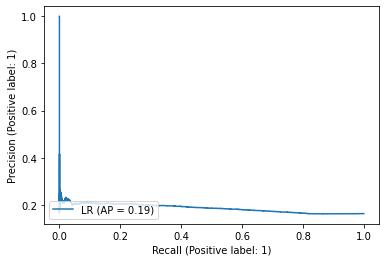

In [66]:
display = sklearn.metrics.PrecisionRecallDisplay.from_predictions(y_test, y_values, name="LR")

In [26]:
class MySVM:

    def __init__(self, d, max_iters, eta_val, c):
        self.w = np.zeros(d)
        self.w_old = np.random.uniform(-0.01, 0.01, d)
        self.w_sum = np.zeros(d)
        self.w_sum += self.w_old
        self.max_iters = max_iters
        self.eta_val = eta_val
        self.c = c
        self.iters = 0
        self.losses = []
        self.gradient_magnitudes = []

    def fit(self, X, y):
        (n, d) = X.shape
        while self.iters < self.max_iters:
            i = np.random.randint(n)
            # compute loss; maybe modify for weighted?
            loss = (1/2)*np.linalg.norm(self.w_old)**2 + self.c*max(0, 1 - y[i]*(self.w_old @ X[i, :]))
            self.losses.append(loss)
            gradient_magnitude = 0
            for j in range(d):
                if y[i]*(self.w_old @ X[i, :]) < 1:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j] - self.c*y[i]*X[i,j])
                    gradient_magnitude += (self.w_old[j] - self.c*y[i]*X[i,j])**2
                else:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j])
                    gradient_magnitude += (self.w_old[j])**2
                self.w_old[j] = self.w[j]
            self.gradient_magnitudes.append(gradient_magnitude)
            self.w_sum += self.w
            self.iters += 1
            if np.average(self.gradient_magnitudes[-10:]) < 1e-6:
                break

    def predict(self, X):
        w_avg = self.w_sum / self.iters
        return np.sign(X @ w_avg)
    
    def predict_proportion(self, X, prop):
        w_avg = self.w_sum / self.iters
        values = X @ w_avg
        print(values)
        threshold = np.quantile(values, 1-prop)
        print("Threshold: ", threshold)
        preds = np.zeros(len(values))
        for i in range(len(preds)):
            if values[i] >= threshold:
                preds[i] = 1
            else:
                preds[i] = -1 # not having this ruined it???
        return preds

In [ ]:
class MyWeightedSVM:

    def __init__(self, d, max_iters, eta_val, c, w1):
        self.w = np.zeros(d)
        self.w_old = np.random.uniform(-0.01, 0.01, d)
        self.w_sum = np.zeros(d)
        self.w_sum += self.w_old
        self.max_iters = max_iters
        self.eta_val = eta_val
        self.c = c
        self.iters = 0
        self.losses = []
        self.gradient_magnitudes = []
        self.w1 = w1

    def fit(self, X, y):
        (n, d) = X.shape
        while self.iters < self.max_iters:
            i = np.random.randint(n)
            # compute loss; maybe modify for weighted?
            loss = (1/2)*np.linalg.norm(self.w_old)**2 + self.c*max(0, 1 - y[i]*(self.w_old @ X[i, :]))
            self.losses.append(loss)
            gradient_magnitude = 0
            for j in range(d):
                if y[i]*(self.w_old @ X[i, :]) < 1:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j] - self.c*y[i]*X[i,j])
                    gradient_magnitude += (self.w_old[j] - self.c*y[i]*X[i,j])**2
                else:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j])
                    gradient_magnitude += (self.w_old[j])**2
                self.w_old[j] = self.w[j]
            self.gradient_magnitudes.append(gradient_magnitude)
            self.w_sum += self.w
            self.iters += 1
            if np.average(self.gradient_magnitudes[-10:]) < 1e-6:
                break

    def predict(self, X):
        w_avg = self.w_sum / self.iters
        return np.sign(X @ w_avg)
    
    def predict_proportion(self, X, prop):
        w_avg = self.w_sum / self.iters
        values = X @ w_avg
        print(values)
        threshold = np.quantile(values, 1-prop)
        print("Threshold: ", threshold)
        preds = np.zeros(len(values))
        for i in range(len(preds)):
            if values[i] >= threshold:
                preds[i] = 1
            else:
                preds[i] = -1 # not having this ruined it???
        return preds

In [27]:
#SVM
eta_vals = [0.00001, 0.0001, 0.001]
C_vals = [1, 10, 100]
best_score = 0
best_eta, best_c = (0, 0)

for eta_val in eta_vals:
    for c_val in C_vals:

        # instantiate svm object
        svm = MySVM(num_features, 100000, eta_val, c_val)

        # call to your CV function to compute error rates for each fold
        #cv_scores = my_cross_val_imbalanced(svm, 'f1', proportion, X_train, y_train, k=10)
        cv_scores = my_cross_val_imbalanced(svm, 'auprc', None, X_train, y_train, k=10)

        # print error rates from CV
        print("Eta: " + str(eta_val))
        print("C: " + str(c_val))
        for i in range(10):
            print("AUPRC score for fold " + str(i) + ": " + str(cv_scores[i]))
        mean_score = sum(cv_scores)/len(cv_scores)
        print("Mean validation AUPRC score: " + str(mean_score))
        print("Validation AUPRC score stdev: " + str(np.std(cv_scores)))
        if mean_score >= best_score:
            best_score = mean_score
            best_eta, best_c = (eta_val, c_val)

# instantiate svm object for best value of eta and C
print("Best eta value: " + str(best_eta))
print("Best C value: " + str(best_c))
best_svm = MySVM(num_features, 100000, best_eta, best_c)

# fit model using all training data
best_svm.fit(X_train, y_train)

# predict on test data
#y_preds = best_svm.predict_proportion(X_test, proportion)
y_preds = best_svm.predict(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_preds)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

Eta: 1e-05
C: 1
AUPRC score for fold 0: 0.16456888656286797
AUPRC score for fold 1: 0.1643290768264601
AUPRC score for fold 2: 0.16218762266125866
AUPRC score for fold 3: 0.16354406531295793
AUPRC score for fold 4: 0.16318199659819443
AUPRC score for fold 5: 0.1655109250294387
AUPRC score for fold 6: 0.16480008373456145
AUPRC score for fold 7: 0.1616904356927908
AUPRC score for fold 8: 0.1648524178354616
AUPRC score for fold 9: 0.16344367395001963
Mean validation AUPRC score: 0.16381091842040113
Validation AUPRC score stdev: 0.0011631574794504053
Eta: 1e-05
C: 10
AUPRC score for fold 0: 0.16456888656286797
AUPRC score for fold 1: 0.1643290768264601
AUPRC score for fold 2: 0.16218762266125866
AUPRC score for fold 3: 0.16354406531295793
AUPRC score for fold 4: 0.16318199659819443
AUPRC score for fold 5: 0.1655109250294387
AUPRC score for fold 6: 0.16480008373456145
AUPRC score for fold 7: 0.1616904356927908
AUPRC score for fold 8: 0.1648524178354616
AUPRC score for fold 9: 0.163443673950

In [28]:
#SVM with predicting the top expected number of 1s as 1s
eta_vals = [0.00001, 0.0001, 0.001]
C_vals = [1, 10, 100]
best_score = 0
best_eta, best_c = (0, 0)

for eta_val in eta_vals:
    for c_val in C_vals:

        # instantiate svm object
        svm = MySVM(num_features, 100000, eta_val, c_val)

        # call to your CV function to compute error rates for each fold
        cv_scores = my_cross_val_imbalanced(svm, 'auprc', proportion, X_train, y_train, k=10)
        #cv_scores = my_cross_val_imbalanced(svm, 'f1', None, X_train, y_train, k=10)

        # print error rates from CV
        print("Eta: " + str(eta_val))
        print("C: " + str(c_val))
        for i in range(10):
            print("AUPRC score for fold " + str(i) + ": " + str(cv_scores[i]))
        mean_score = sum(cv_scores)/len(cv_scores)
        print("Mean validation AUPRC score: " + str(mean_score))
        print("Validation AUPRC score stdev: " + str(np.std(cv_scores)))
        if mean_score >= best_score:
            best_score = mean_score
            best_eta, best_c = (eta_val, c_val)

# instantiate svm object for best value of eta and C
print("Best eta value: " + str(best_eta))
print("Best C value: " + str(best_c))
best_svm = MySVM(num_features, 100000, best_eta, best_c)

# fit model using all training data
best_svm.fit(X_train, y_train)

# predict on test data
y_preds = best_svm.predict_proportion(X_test, proportion)
#y_preds = best_svm.predict(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_preds)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

[ 519.7323045  8564.16511868 7084.28862452 ...  519.51153389 6425.40159896
 4708.48593585]
Threshold:  8623.815823349525
[8242.56461322 6928.36506666 6203.1995316  ...  519.61898471 4012.72574673
 6050.41164306]
Threshold:  8648.83071992823
[6674.48430257 6418.57482983 5499.09741823 ... 8408.68559863 7013.3706258
  519.6452891 ]
Threshold:  8642.815839832976
[7605.31790447 6922.3815539  8190.62793818 ... 5884.31988391 9807.0472893
 6524.92295554]
Threshold:  8695.873205418015
[8406.99748308 9154.32372851 4847.13807359 ... 5629.69534703  519.64769601
 5653.64034193]
Threshold:  8620.216447723373
[9737.43023933 7008.22890526  519.55688084 ... 5751.72500984 5113.93534258
 9716.26359841]
Threshold:  8648.813775592756
[6139.28980729 6008.24919593 5878.42954668 ... 6093.30159753 5154.84942132
 6639.74121256]
Threshold:  8655.241198866835
[ 7814.89596431  7347.70318489 10729.59840238 ...  8324.87166203
  5172.2221726   5735.70128295]
Threshold:  8664.041331850418
[ 6188.14922012  7068.2468935

[119803.40171145 112643.02720144 164487.31747085 ... 127621.4074968
  79292.2319312   87931.4837643 ]
Threshold:  132822.12932308306
[ 94867.69405588 108358.24085907 184808.16259678 ... 125254.87056935
 113009.6221752    7969.66533219]
Threshold:  132327.14907495925
[ 82767.8754955  117461.02454195  59726.03400825 ... 122551.89878855
  76907.42854226  92107.08473639]
Threshold:  132452.45480669307
Eta: 0.0001
C: 10
F1 score for fold 0: 0.1715850230955856
F1 score for fold 1: 0.17166019056785062
F1 score for fold 2: 0.16974911195636394
F1 score for fold 3: 0.17129807182549
F1 score for fold 4: 0.17146093488068873
F1 score for fold 5: 0.17374414364333596
F1 score for fold 6: 0.17266336120497722
F1 score for fold 7: 0.16976298378621305
F1 score for fold 8: 0.17084193443524698
F1 score for fold 9: 0.1711142577550388
Mean validation F1 score: 0.17138800131507909
Validation F1 score stdev: 0.0011403519448976265
[ 3.96443841 39.76330229 35.3868187  ...  6.83191862 32.903231
 22.25362973]
Thre

[16.66112787 18.93190292 12.74201339 ... 17.33072038 16.07872706
 12.12901723]
Threshold:  19.806449688603355
Test precision: 0.21010762751520823
Test recall: 0.21017319394601341
Test F1 score: 0.21014040561622466
Test AUPRC score: 0.1735011653325141


In [51]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
train_data['Vintage'].unique()

array([ 16, 135, 253,  69, 211,  23, 209,  51, 262, 217,  73,  12, 165,
        34, 263, 155, 151, 176, 177, 240,  44, 256, 254, 279, 293, 252,
        42, 270, 271,  30, 247, 143, 248, 267, 109,  68, 255,  38, 224,
       236,  74, 202,  21, 287, 161,  92, 181,  14, 275,  22, 188,  47,
        95,  49,  77, 123, 225,  98,  96, 187, 204, 282,  79, 292, 136,
       119, 290, 128, 168, 167, 199, 288, 272, 281,  27, 296,  39, 170,
       213, 250, 116, 114, 102, 237, 166, 159, 158, 110, 276, 172, 106,
       246, 259,  76,  45,  41, 121, 118,  25, 103, 261, 105, 101, 163,
        13, 257, 183, 115, 117, 129, 107, 138, 242,  31,  82, 249,  71,
       220,  64, 192, 182,  63, 233, 191, 284, 141, 162, 180, 113, 111,
       265, 140, 169,  48, 235, 234, 227, 196, 294,  15,  58, 251, 216,
       133,  86,  40, 134,  84, 149,  88, 208, 152, 144, 142, 239,  18,
       266, 238,  57, 285, 278, 178, 283,  80, 147, 214, 157, 130, 228,
        28,  33,  60, 274, 100, 218, 139, 195,  70, 146,  37,  2

In [56]:
train_data.columns[62]

'Vehicle_Age_> 2 Years'